## Assignment 4: Comparison of Mean and Median Filter   (20 marks)

Image denoising is an essential task in image processing, with common methods including mean filtering and median filtering. Mean filtering smooths an image by averaging pixel values within a neighborhood, while median filtering replaces a pixel's value with the median of its neighborhood. These methods perform differently when dealing with various types of noise.

**Task Description**

1. Write a Python program to apply mean filtering and median filtering to a noisy grayscale image (3×3 filter window size).
2. Display the denoised results for both filters side by side with the original noisy image for visual comparison.
3. Provide a brief comparative analysis of the two methods.


### Task 1. Mean filtering (8 marks)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

noisy_image = cv2.imread("Test_noisy_img.png", 0)
h, w = noisy_image.shape

PaddingNoisyImage = np.pad(noisy_image, ((1, 1), (1, 1)))
PaddingNoisyImage = PaddingNoisyImage.astype(np.int16)

Pixel_list = []
for i in range(1, h + 1):
    for j in range(1, w + 1):
        neighbourlist = []

        neighbourlist.append(PaddingNoisyImage[i - 1][j - 1])
        neighbourlist.append(PaddingNoisyImage[i - 1][j])
        neighbourlist.append(PaddingNoisyImage[i - 1][j + 1])

        neighbourlist.append(PaddingNoisyImage[i][j - 1])
        neighbourlist.append(PaddingNoisyImage[i][j])
        neighbourlist.append(PaddingNoisyImage[i][j + 1])

        neighbourlist.append(PaddingNoisyImage[i + 1][j - 1])
        neighbourlist.append(PaddingNoisyImage[i + 1][j])
        neighbourlist.append(PaddingNoisyImage[i + 1][j + 1])

        Pixel_list.append(sum(neighbourlist) / 9)

Mean_Filtered_Image = np.array(Pixel_list).reshape(h, w)


### Task 2. Median filtering (8 marks)

In [5]:
Pixel_list = []
for i in range(1, h + 1):
    for j in range(1, w + 1):
        neighbourlist = []

        neighbourlist.append(PaddingNoisyImage[i - 1][j - 1])
        neighbourlist.append(PaddingNoisyImage[i - 1][j])
        neighbourlist.append(PaddingNoisyImage[i - 1][j + 1])

        neighbourlist.append(PaddingNoisyImage[i][j - 1])
        neighbourlist.append(PaddingNoisyImage[i][j])
        neighbourlist.append(PaddingNoisyImage[i][j + 1])

        neighbourlist.append(PaddingNoisyImage[i + 1][j - 1])
        neighbourlist.append(PaddingNoisyImage[i + 1][j])
        neighbourlist.append(PaddingNoisyImage[i + 1][j + 1])

        neighbourlist.sort()
        Pixel_list.append(neighbourlist[4])

Median_Filtered_Image = np.array(Pixel_list).reshape(h, w)

### Task 3. Plotting and Analyzing (4 marks)

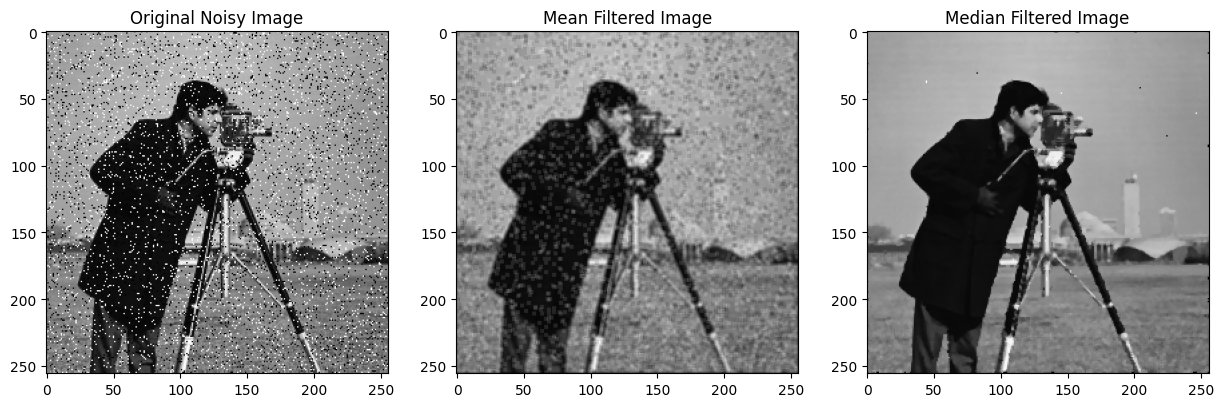

In [7]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap="gray", vmin=0, vmax=255)
plt.title("Original Noisy Image")

plt.subplot(1, 3, 2)
plt.imshow(Mean_Filtered_Image, cmap="gray", vmin=0, vmax=255)
plt.title("Mean Filtered Image")

plt.subplot(1, 3, 3)
plt.imshow(Median_Filtered_Image, cmap="gray", vmin=0, vmax=255)
plt.title("Median Filtered Image")

plt.show()

The "Mean Filter" reduces noise by averaging pixels, but results in a blurry image and loss of edge detail. It is effective however at reducing uniform or Gaussian noise.

The "Median Filter" is good against black and white noise, removing it while preserving sharp edges and fine details. Can be computationally more expensive (requires sorting) and can sometimes remove very small legitimate details. 

For this specific noisy image, the "Median Filter" performed best because it cleaned the noise without blurring the overall image.